# Random walk on networks with fat-tailed degree distributio

# Question 2.a
Generate an undirected preferential attachment network with 1000 nodes, where each new node attaches to m = 1 old nodes.

In [1]:
library('igraph')
library('Matrix')
library('pracma')


Attaching package: 'igraph'


The following objects are masked from 'package:stats':

    decompose, spectrum


The following object is masked from 'package:base':

    union



Attaching package: 'pracma'


The following objects are masked from 'package:Matrix':

    expm, lu, tril, triu




In [2]:
g=barabasi.game(1000,m=1,directed=F)

# Question 2.b
Let a random walker start from a randomly selected node. Measure and plot hs(t)i v.s. t and σ2(t) v.s. t.

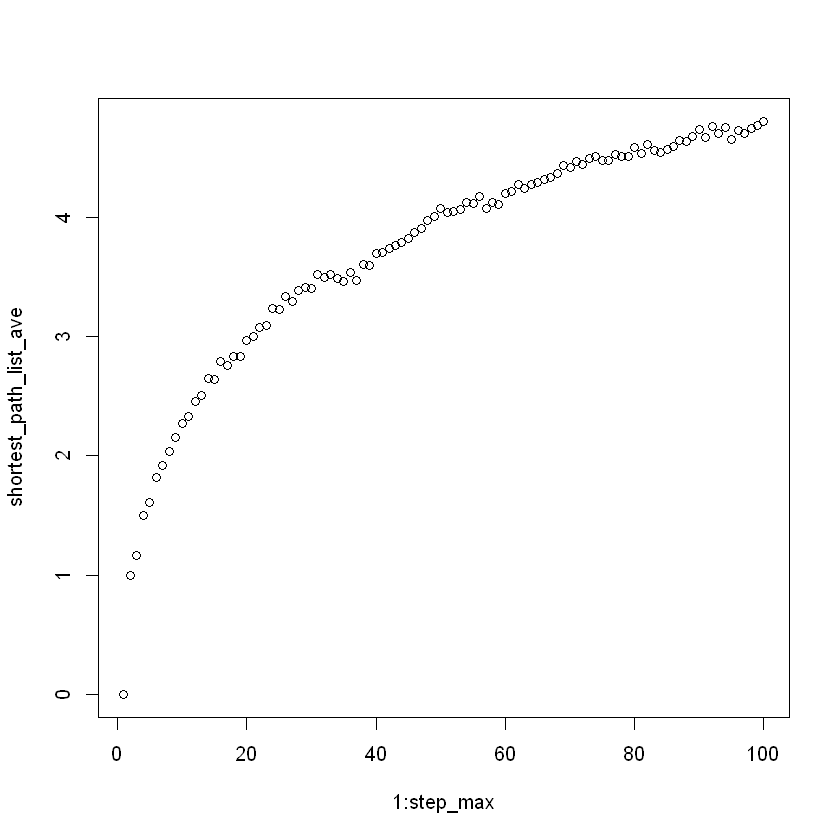

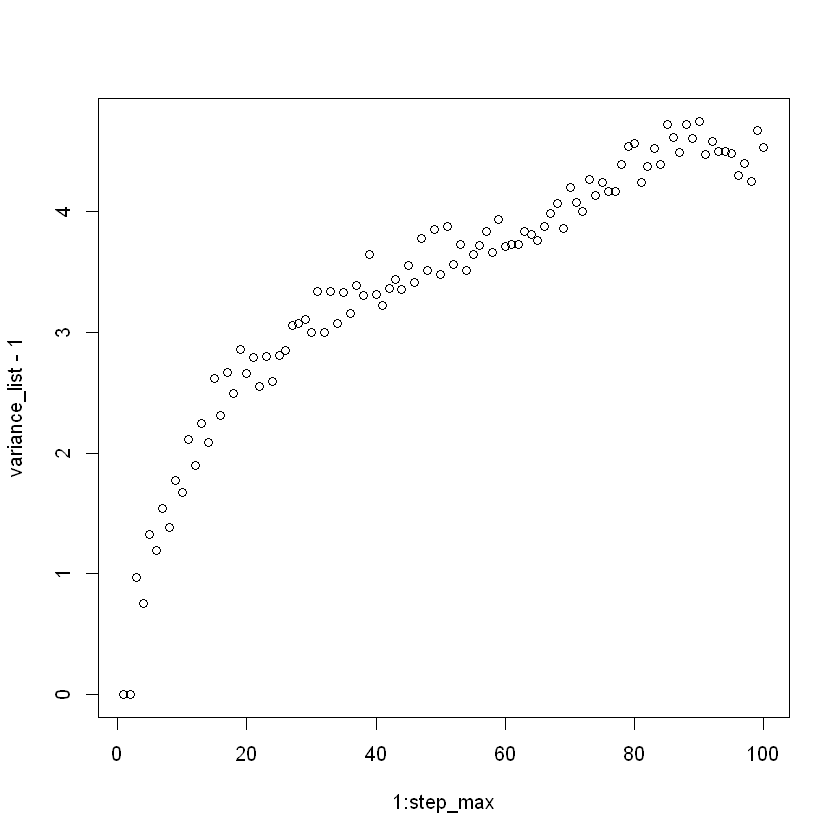

In [3]:
#define 100 different randomly chosen starting nodes
start_node=sample(1:1000,500)
#define maximum step length as 1000 since there are only 1000 nodes in the graph
step_max=100
#define empty list to contain all visited node and end point
path_list=vector(mode="list",length=length(start_node))
end_list=vector(mode="list",length=length(start_node))
for (i in 1:length(start_node)){
    path=random_walk(g,start=start_node[i],steps=step_max,stuck=c('return'))
    path_list[[i]]=path
    end_list[[i]]=path[length(path)]
}

#measurement
#define shortest path list and variance list
shortest_path_list_ave=vector(mode='numeric',length=step_max)
variance_list=vector(mode='numeric',length=step_max)

for (i in 1:step_max){
    shortest_path_sum=0
    shortest_path_list=vector(mode='list',length=length(start_node))
    for (j in 1:length(start_node)){
        #obtain shortest path from start node j to each end node
        shortest_path=shortest_paths(g,from=start_node[j],to=path_list[[j]][i],output=c('vpath'))
        shortest_path_sum=shortest_path_sum+length(shortest_path[[1]][[1]])-1
        shortest_path_list[[j]]=shortest_path[[1]][[1]]
    }
    #take average over 100 times walk
    shortest_path_list_ave[i]=shortest_path_sum/length(start_node)
    for (k in 1:length(start_node)){
        variance_list[i]=variance_list[i]+(length(shortest_path_list[[k]])-shortest_path_list_ave[i])**2
        
    }
    variance_list[i]=variance_list[i]/length(start_node)
}
#plot shortest_path_average and variance
plot(1:step_max,shortest_path_list_ave,type='p')
plot(1:step_max,variance_list-1,type='p')

# Question 2.c
Measure the degree distribution of the nodes reached at the end of the random walk on this network. How does it compare with the degree distribution of the graph? 

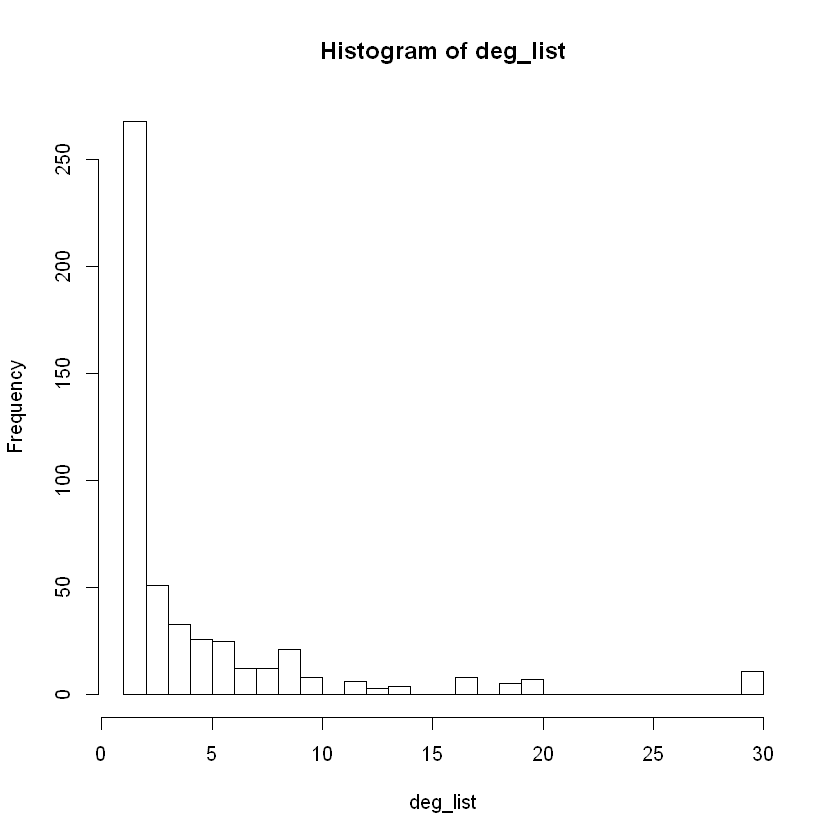

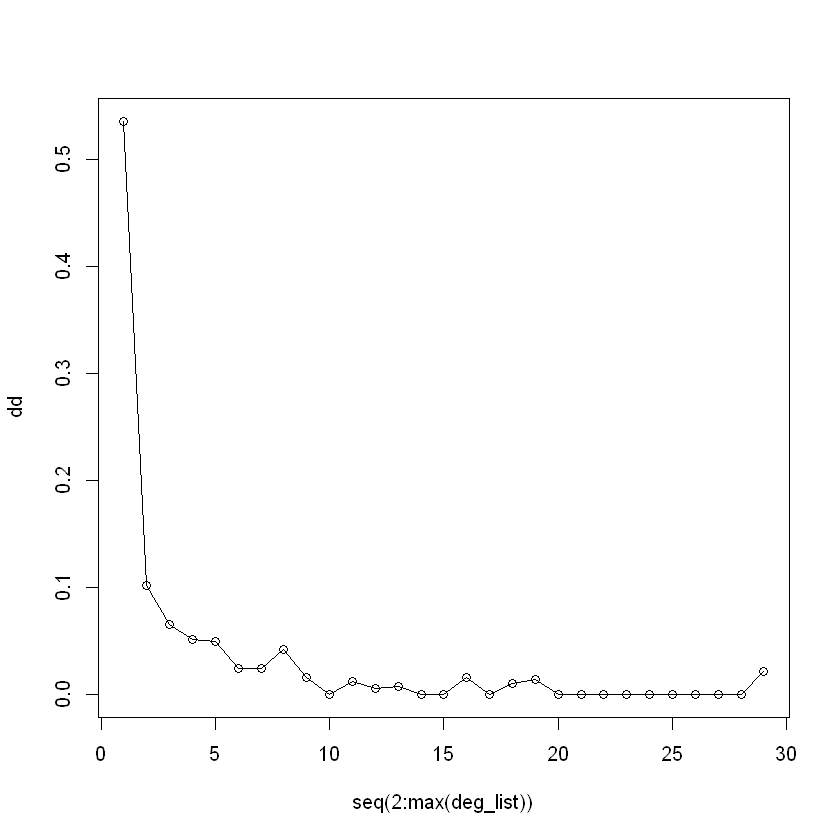

In [7]:
#1000 steps, 100 walks, the statistical data is obtained from 100 trials
deg_list=degree(g,end_list)
#plot histogram of the degree distribution of end node
h=hist(deg_list,breaks=1:max(deg_list))
dd=h$density
plot(seq(2:max(deg_list)),dd)
lines(seq(2:max(deg_list)),dd)

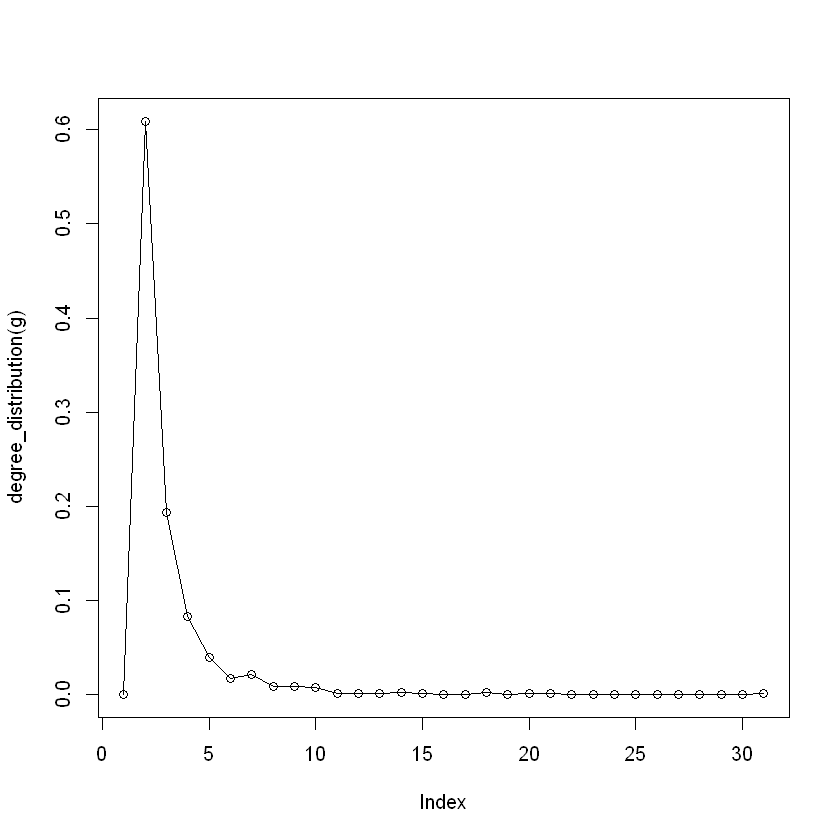

In [8]:
#plot degree distribution of the entire graph
plot(degree_distribution(g))
lines(degree_distribution(g))

# Question 2.d
Repeat 2(b) for preferential attachment networks with 100 and 10000 nodes, and m = 1. Compare the results and explain qualitatively. Does the diameter of the network play a role?


# n=100

In [14]:
#num of node is 100
g2=barabasi.game(100,m=1,directed=F)

#define 100 different randomly chosen starting nodes
start_node=sample(1:100,100)
#define maximum step length as 1000 since there are only 1000 nodes in the graph
step_max=100
#define empty list to contain all visited node and end point
path_list=vector(mode="list",length=length(start_node))
end_list=vector(mode="list",length=length(start_node))
for (i in 1:length(start_node)){
    path=random_walk(g2,start=start_node[i],steps=step_max,stuck=c('return'))
    path_list[[i]]=path
    end_list[[i]]=path[length(path)]
}

#measurement
#define shortest path list and variance list
shortest_path_list_ave=vector(mode='numeric',length=step_max)
variance_list=vector(mode='numeric',length=step_max)

for (i in 1:step_max){
    shortest_path_sum=0
    shortest_path_list=vector(mode='list',length=length(start_node))
    for (j in 1:length(start_node)){
        #obtain shortest path from start node j to each end node
        shortest_path=shortest_paths(g2,from=start_node[j],to=path_list[[j]][i],output=c('vpath'))
        shortest_path_sum=shortest_path_sum+length(shortest_path[[1]][[1]])-1
        shortest_path_list[[j]]=shortest_path[[1]][[1]]
    }
    #take average over 100 times walk
    shortest_path_list_ave[i]=shortest_path_sum/length(start_node)
    for (k in 1:length(start_node)){
        variance_list[i]=variance_list[i]+(length(shortest_path_list[[k]])-shortest_path_list_ave[i])**2
        
    }
    variance_list[i]=variance_list[i]/length(start_node)
}


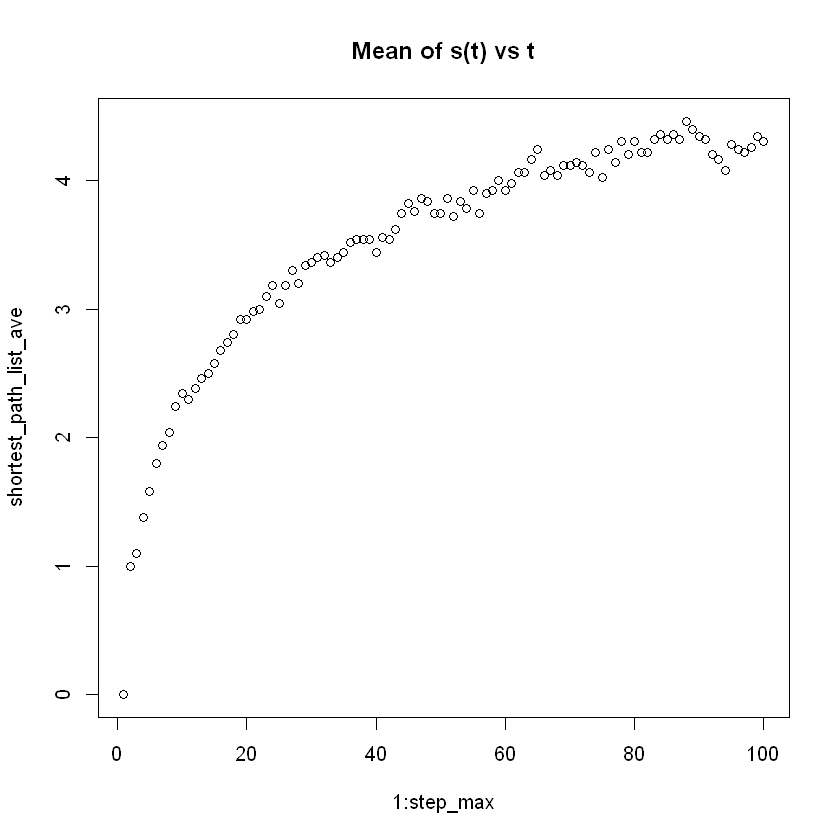

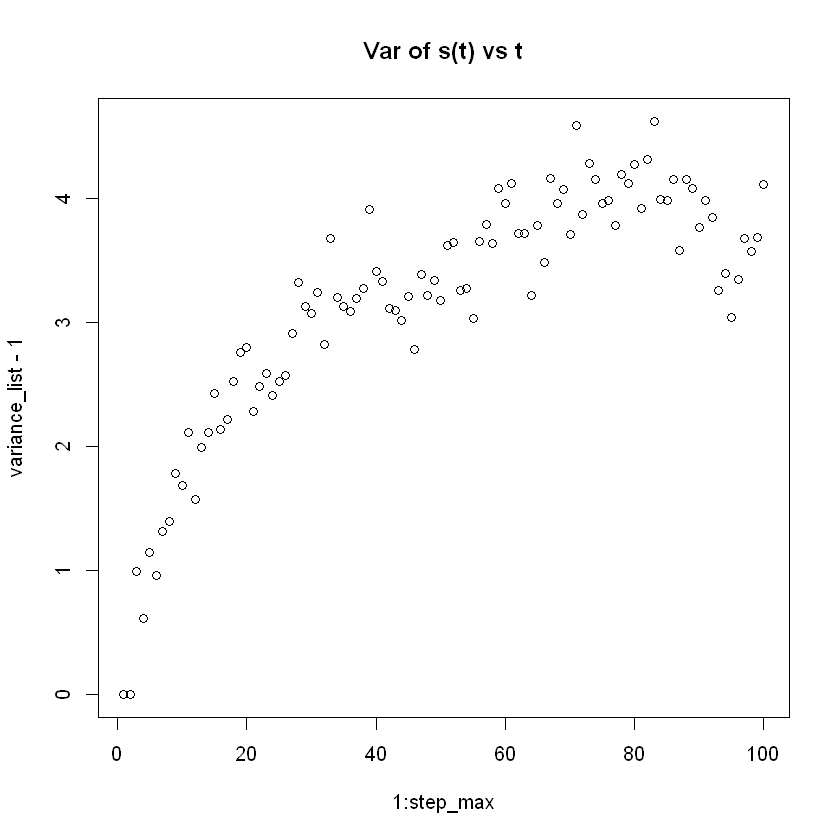

In [15]:
#plot shortest_path_average and variance
plot(1:step_max,shortest_path_list_ave,type='p',main="Mean of s(t) vs t")
plot(1:step_max,variance_list-1,type='p',main="Var of s(t) vs t")

# m=10000

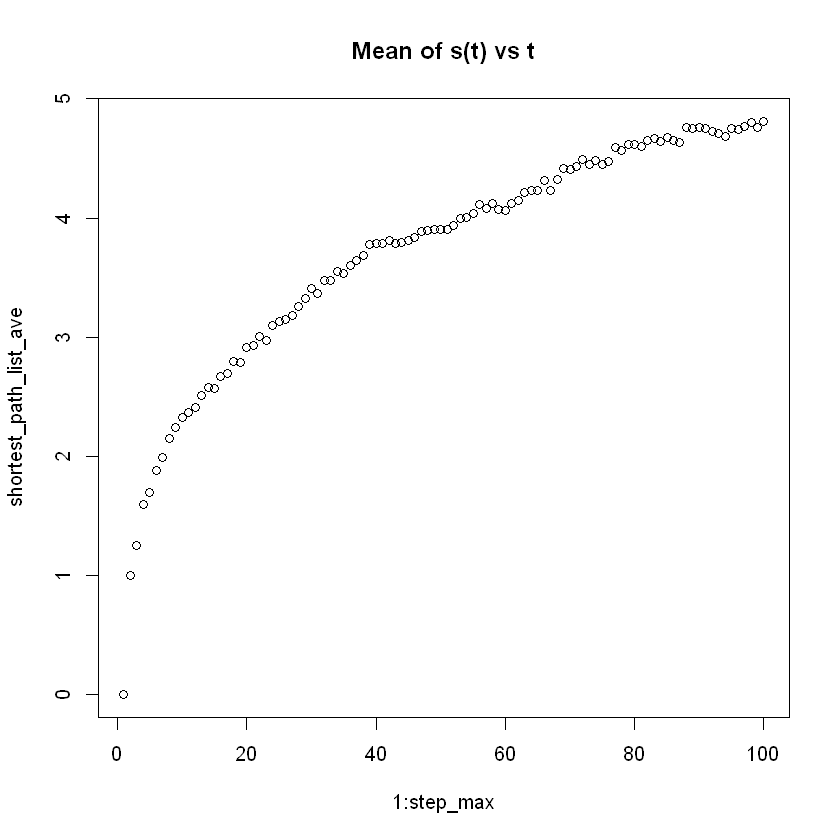

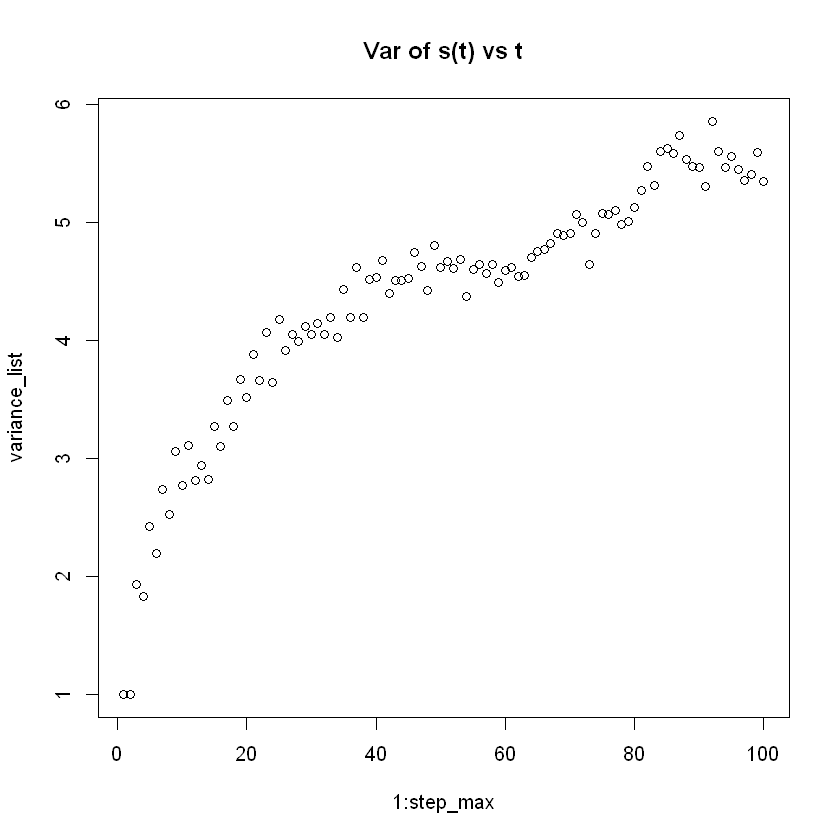

In [16]:
#num of node is 10000
g3=barabasi.game(10000,m=1,directed=F)

#define 100 different randomly chosen starting nodes
start_node=sample(1:10000,500)
#define maximum step length as 1000 since there are only 1000 nodes in the graph
step_max=100
#define empty list to contain all visited node and end point
path_list=vector(mode="list",length=length(start_node))
end_list=vector(mode="list",length=length(start_node))
for (i in 1:length(start_node)){
    path=random_walk(g3,start=start_node[i],steps=step_max,stuck=c('return'))
    path_list[[i]]=path
    end_list[[i]]=path[length(path)]
}

#measurement
#define shortest path list and variance list
shortest_path_list_ave=vector(mode='numeric',length=step_max)
variance_list=vector(mode='numeric',length=step_max)

for (i in 1:step_max){
    shortest_path_sum=0
    shortest_path_list=vector(mode='list',length=length(start_node))
    for (j in 1:length(start_node)){
        #obtain shortest path from start node j to each end node
        shortest_path=shortest_paths(g3,from=start_node[j],to=path_list[[j]][i],output=c('vpath'))
        shortest_path_sum=shortest_path_sum+length(shortest_path[[1]][[1]])-1
        shortest_path_list[[j]]=shortest_path[[1]][[1]]
    }
    #take average over 100 times walk
    shortest_path_list_ave[i]=shortest_path_sum/length(start_node)
    for (k in 1:length(start_node)){
        variance_list[i]=variance_list[i]+(length(shortest_path_list[[k]])-shortest_path_list_ave[i])**2
        
    }
    variance_list[i]=variance_list[i]/length(start_node)
}

#plot shortest_path_average and variance
plot(1:step_max,shortest_path_list_ave,type='p',main="Mean of s(t) vs t")
plot(1:step_max,variance_list,type='p',main="Var of s(t) vs t")

In [10]:
#diameter comparsion
cat("The diameter of 100-node graph is ",diameter(g2),"\n")
cat("The diameter of 1000-node graph is ",diameter(g),"\n")
cat("The diameter of 10000-node graph is ",diameter(g3),"\n")

[1] "The diameter of 100-node graph is 13"
[1] "The diameter of 1000-node graph is 17"
[1] "The diameter of 10000-node graph is 32"
